In [1]:
import time
import sys
import os

# 현재 파일(main.ipynb)이 있는 디렉토리의 부모 디렉토리를 sys.path에 추가
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
# INFO 
from Omok.Jimin.main.config import *
from Omok.Jimin.utils.setDevice import *

# CODES
from state.ver2 import *
from network.resnet import *
from trainer.ver1 import *
from eval.ver1 import *
from selfplay.ver1 import *
from tester.nnVsHuman import *

In [ ]:
Selfplay = get_selfplay_class()

In [3]:
model = Network(N_RESIDUAL_BLOCK, N_KERNEL, 2, N_ACTIONS)
params = torch.load("/Users/ijimin/Documents/GitHub/AiGO/Omok/Jimin/model/Omok_1/best_model_weight.pth", weights_only=False)
model.load_state_dict(params)

<All keys matched successfully>

In [4]:
class ModelvsHuman:
    def __init__(self, model):
        self.model = model
        self.mcts = MCTS(EVAL_GAME_COUNT)
        self.get_next_actions = self.mcts.get_legal_actions_of(model, 0)

    def render(self, state):

        board = state.board[0] + (-1 * state.board[1]) if state.is_first_player() else state.board[1] + (-1 * state.board[0])

        def pattern(x):
            if x == 1:
                return 'O'
            elif x == 0:
                return ' '
            else:
                return 'X'

        df = pd.DataFrame(board)
        df = df.map(pattern)
        display(df)

    def vs_human(self, with_policy):
        state = State()
        print(state)

        while True:
            if state.is_done():
                break

            else:
                action = self.get_next_actions(state)
                learned_policy = np.zeros(state.n_actions)

                legal_policy = self.mcts.legal_policy
                learned_policy[state.get_legal_actions()] = legal_policy

                state = state.next(action)


                print(f"Alpha Zero's Action is : {action}")
                print(state)
                print()

                my_action = int(input("Choose Your Action : "))
                print(f"Human's Action is : {my_action}")
                state = state.next(my_action)
                print(state)
                print()

    def __call__(self, with_policy=True):
        self.vs_human(with_policy)

vs = ModelvsHuman(model)
vs()

  0 1 2 3 4 5 6 7 8
A . . . . . . . . .
B . . . . . . . . .
C . . . . . . . . .
D . . . . . . . . .
E . . . . . . . . .
F . . . . . . . . .
G . . . . . . . . .
H . . . . . . . . .
I . . . . . . . . .
Alpha Zero's Action is : 0
  0 1 2 3 4 5 6 7 8
A ● . . . . . . . .
B . . . . . . . . .
C . . . . . . . . .
D . . . . . . . . .
E . . . . . . . . .
F . . . . . . . . .
G . . . . . . . . .
H . . . . . . . . .
I . . . . . . . . .

Human's Action is : 10
  0 1 2 3 4 5 6 7 8
A ● . . . . . . . .
B . ○ . . . . . . .
C . . . . . . . . .
D . . . . . . . . .
E . . . . . . . . .
F . . . . . . . . .
G . . . . . . . . .
H . . . . . . . . .
I . . . . . . . . .

Alpha Zero's Action is : 1
  0 1 2 3 4 5 6 7 8
A ● ● . . . . . . .
B . ○ . . . . . . .
C . . . . . . . . .
D . . . . . . . . .
E . . . . . . . . .
F . . . . . . . . .
G . . . . . . . . .
H . . . . . . . . .
I . . . . . . . . .

Human's Action is : 11
  0 1 2 3 4 5 6 7 8
A ● ● . . . . . . .
B . ○ ○ . . . . . .
C . . . . . . . . .
D . . . . . . . .

,0,1,2
0,,,
1,,,
2,,,


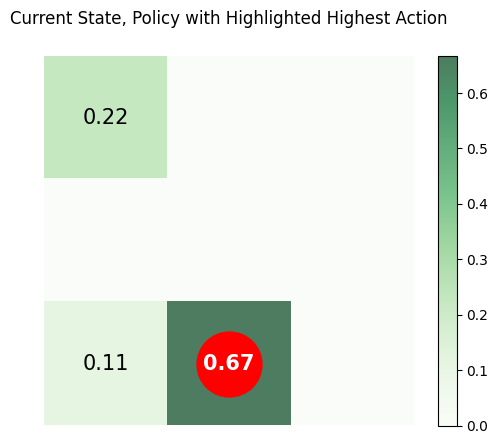

Alpha Zero's Action is : 7


,0,1,2
0,,,
1,,,
2,,O,


,0,1,2
0,,,
1,,X,
2,,O,


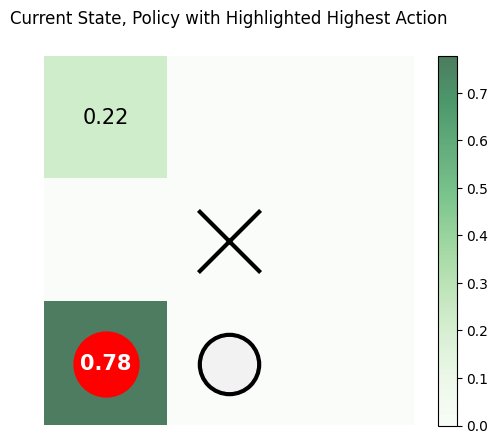

Alpha Zero's Action is : 0


,0,1,2
0,O,,
1,,X,
2,,O,


,0,1,2
0,O,,
1,,X,
2,X,O,


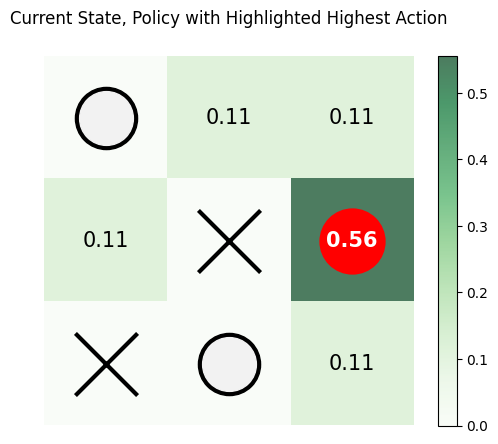

Alpha Zero's Action is : 8


,0,1,2
0,O,,
1,,X,
2,X,O,O


,0,1,2
0,O,,X
1,,X,
2,X,O,O


In [5]:
vs_human = ModelvsHuman(model)
vs_human()

In [6]:
from MCTS.ver1 import *

In [7]:
history = []
state = State()
mcts = MCTS(100)

print(state.is_done())
while True:
    if state.is_done():
        break
    
    learned_policy = np.zeros([state.n_actions])
    legal_policy = mcts.get_legal_policy(state, model, 1.0)
    learned_policy[state.get_legal_actions()] = legal_policy
    history.append([state.board, learned_policy, None])

    print(" ")
    print(state.board)
    print(learned_policy)

    action = np.random.choice(state.get_legal_actions(), p=legal_policy)

    state = state.next(action)

False
 
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[0.01010101 0.         0.         0.33333333 0.65656566 0.
 0.         0.         0.        ]
 
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 1. 0.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
[0.92929293 0.01010101 0.01010101 0.01010101 0.         0.01010101
 0.01010101 0.01010101 0.01010101]
 
[[[0. 0. 0.]
  [0. 1. 0.]
  [0. 0. 0.]]

 [[1. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[0.         0.15151515 0.         0.84848485 0.         0.
 0.         0.         0.        ]
 
[[[1. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [1. 1. 0.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
[0.         0.36363636 0.58585859 0.         0.         0.01010101
 0.01010101 0.01010101 0.02020202]
 
[[[0. 0. 0.]
  [1. 1. 0.]
  [0. 0. 0.]]

 [[1. 0. 1.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0.

In [8]:
i = 2

p, v = model(torch.tensor(history[4][0], dtype=torch.float32).reshape(1, 3, 3, 3))
print(np.round(p.detach().numpy().reshape((3,3)), 3))
print(v)

RuntimeError: shape '[1, 2, 3, 3]' is invalid for input of size 27

In [2]:
import matplotlib.pyplot as plt

In [15]:
game_info = {'win' : 100, 
             'lose' : 30, 
             'draw' : 50}

plt.(game_info)